**Coursebook: Python for Data Analysts**
- Part 1 of Machine Learning Specialization
- Course Length: 6 hours
- Last Updated: October 2020

___

- Author: [Samuel Chan](https://github.com/onlyphantom)
- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Introduction to Data Analytics

## Training Objectives

This coursebook is intended for participants with prior programming knowledge as an introductory material for Machine Learning Specialization.

The coursebook focuses on:
- Introduction to the `pandas` library.  
- Data Types
- Exploratory Data Analysis
- Indexing and Subsetting
- Tables

The final part of this course is a Graded Asssignment, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

## Introduction to `pandas` library

We will start off by learning about a powerful Python data analysis library by the name of `pandas`. Its official documentation introduces itself as the "fundamental high-level building block for doing practical, real world data analysis in Python", and strive to do so by implementing many of the key data manipulation functionalities in R. This makes `pandas` a core member of many Python-based scientific computing environments.

From its [official documentation](https://pandas.pydata.org):

> Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

To use `pandas`, we will use Python's `import` function. Once imported, all `pandas` function can be accessed using the *pandas.function_name* notation.

In [1]:
import pandas as pd
pd.__version__

'1.0.1'

In [2]:
household = pd.read_csv(r"D:\INALUM\3 TRAINING\MACHINE LEARNING\MATERIAL\inalum\data\household.csv", index_col = 0)
household.head()

# Sudah dimodifikasi sedikit pembacaan untuk file household yang disimpan pada folder berbeda #

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth
receipt_id,,,,,,,,,
9622257,32369294,7/22/2018 21:19,Rice,Rice,supermarket,128000.0,0,1,2018-07
9446359,31885876,7/15/2018 16:17,Rice,Rice,minimarket,102750.0,0,1,2018-07
9470290,31930241,7/15/2018 12:12,Rice,Rice,supermarket,64000.0,0,3,2018-07
9643416,32418582,7/24/2018 8:27,Rice,Rice,minimarket,65000.0,0,1,2018-07
9692093,32561236,7/26/2018 11:28,Rice,Rice,supermarket,124500.0,0,1,2018-07


In the code above, we used `.read_csv()` to read a csv file from a specified path. Notice that we set `index_col=0` so the first column in the csv is used as the index. By default, this function treats the first row as the header row. We can add `header=None` to the function call telling `pandas` to read in a CSV without headers.

You may find it curious that we use `0` to reference the first element of an axis; This is because Python uses 0-based indexing, a behavior that is different from other languages such as R and Matlab.

**Knowledge Check**:  

Let's dive deeper into understanding the `index_col` parameter. From the documentation:

> `index_col` : int or sequence or `False`  
Column to use as the row labels of the DataFrame.

1. How would you change the `read.csv()` code such that the DataFrame uses `receipt_id` as the row label (index)? 
2. `pandas.DataFrame.head()` accepts an additional parameter, `n`, and returns the first `n` rows of the DataFrame; Set `n=8` to see the first 8 rows of your `rice` DataFrame
3. The opposite of `.head()` is `.tail()`. It returns the last `n` row of your DataFrame. Create a new cell below and print the last 4 rows of our DataFrame 

*Reminder: Python uses 0-based indexing, and `receipt_id` is the second column in the csv*

In [3]:
## Your code here

## 1
## Membaca file household.csv dan menjadikan kolom reciept_id sebagai indekstasi (row label) 
## dan didefinisikan sebagai variable df_example_1
df_example_1 = pd.read_csv(r"D:\INALUM\3 TRAINING\MACHINE LEARNING\MATERIAL\inalum\data\household.csv", index_col = 0)

## 2
## Menampilkan 8 baris teratas dari data household.csv
df_example_1.head(8) 

## 3
## Menampilkan 4 baris terakhis dari data household.csv
df_example_1.tail(4)


## Function terakhir yang akan muncul pada output (function tail dalam hal ini)

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth
receipt_id,,,,,,,,,
5736299,17432379,12/13/2017 19:52,Sugar/Flavored Syrup,Sugar,minimarket,12500.0,0,1,2017-12
5901144,18263665,12/27/2017 8:03,Sugar/Flavored Syrup,Sugar,minimarket,12500.0,0,1,2017-12
5660630,17222218,12/7/2017 12:29,Sugar/Flavored Syrup,Sugar,hypermarket,12500.0,0,3,2017-12
5808147,17658789,12/19/2017 18:59,Sugar/Flavored Syrup,Sugar,minimarket,12500.0,0,3,2017-12


### Data Types

`pandas` allow data analysts to create Series objects and DataFrame objects. Series is used to represent a one-dimensional array whereas DataFrame emulates the functionality of "Data Frames" in R and is useful for tabular data. In practice, a large proportion of our data is tabular: when we import data from a relational database (MySQL, Postgre) or from a spreadsheet software (Google Sheets, Microsoft Excel) we can represent these data as a DataFrame object.

When we call `pd.read_csv()` earlier, `pandas` will try to infer data types from the values in each column. Sometimes, it get it right but more often that not, a data analyst's intervention is required. In the following sub-section, we'll learn about various techniques an analyst have at his/her disposal when it comes to the treatment of pandas data types.

In [4]:
## Untuk melihat tipe data dari masing-masing kolom (secara spesifik hanya melihat tipe data) ##

household.dtypes

receipts_item_id      int64
purchase_time        object
category             object
sub_category         object
format               object
unit_price          float64
discount              int64
quantity              int64
yearmonth            object
dtype: object

In [5]:
## ada 1 funsi lainnya yang dapat digunakan untuk melihat tipe data namun lebih terperinci 
## dan tidak hanya tipe data saja yang muncul (function .info())

household.info()

## dari sini kita bisa melihat sekaligus jumlah row dan kolom dari data tersebut

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72000 entries, 9622257 to 5808147
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   receipts_item_id  72000 non-null  int64  
 1   purchase_time     72000 non-null  object 
 2   category          72000 non-null  object 
 3   sub_category      72000 non-null  object 
 4   format            72000 non-null  object 
 5   unit_price        72000 non-null  float64
 6   discount          72000 non-null  int64  
 7   quantity          72000 non-null  int64  
 8   yearmonth         72000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.5+ MB


`dtypes` simply stands for "data types". Because `elec` is a `pandas` object, accessing the `dtypes` attribute will return a series with the data type of each column. 

**Knowledge check: `.dtypes` and pandas attributes**

Look at the following code - what is the expected output from the following code? Why?
```
x = [2019, 4, 'data science']
x.dtypes
```

Hint: Try `type(x)` and verify the type for object `x`.

In [6]:
## Your code here

x = [2019, 4, "data science"]


"""
x.dtypes
"""

## Pada saat kita jalankan data tersebut di atas, maka akan eror karena data x merupakan type series bukan kolom
## Namun saat kita pakai function numpy maka tipe datanya ketahuan yaitu list.

type(x)

list

Let's take a look at some examples of `DataFrame.dtypes`:

In [7]:
employees = pd.DataFrame({
    'name': ['Anita', 'Brian'],
    'age': [34, 29],
    'joined': [pd.Timestamp('20190410'), pd.Timestamp('20171128')],
    'degree': [True, False],
    'hourlyrate': [35.5, 29],
    'division': pd.Categorical(['HR', 'Product'])
})
employees

,name,age,joined,degree,hourlyrate,division
0,Anita,34,2019-04-10,True,35.5,HR
1,Brian,29,2017-11-28,False,29.0,Product


In [8]:
employees.dtypes

name                  object
age                    int64
joined        datetime64[ns]
degree                  bool
hourlyrate           float64
division            category
dtype: object

Let's go through the columns and their data types from the above `DataFrame`:

- `name` [`object`]: store text values
- `age` [`int`]: integer values
- `joined` [`datetime`]: date and time values
- `degree` [`bool`]: True/False values
- `hourlyrate` [`float`]: floating point values
- `division` [`object`]: store categorical values

Among these columns, only `age` and `hourlyrate` are columns with numeric values. This is a simple, but important, observation to make as we make our way into the Exploratory Data Analysis phase. But before we do, let's do one more exercise. Take a closer look at the Data Frame we just created again.

Out of the 6 columns, one of them is of special interest to our next discussion, **categorical values**.

#### Categorical and Numerical Variables

From the [main documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html):

> Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation or rating via Likert scales.

Can you spot which of the columns in `household` data holds values that should be encoded in the `category` data type? Once you've spotted it, use the `astype('category')` method to perform the conversion. Remember to re-assign this new column so the original column (`object`) type is overwritten with the new `category` type column.

Examples:

```py
# convert marital_status to category
employees['marital_status'] = employees['marital_status'].astype('category')

# convert experience to integer
employees['experience'] = employees['experience'].astype('int')
```

In [9]:
household.dtypes

receipts_item_id      int64
purchase_time        object
category             object
sub_category         object
format               object
unit_price          float64
discount              int64
quantity              int64
yearmonth            object
dtype: object

In [10]:
## Your code below

## Melihat tipe data

df_example_1.dtypes

receipts_item_id      int64
purchase_time        object
category             object
sub_category         object
format               object
unit_price          float64
discount              int64
quantity              int64
yearmonth            object
dtype: object

In [11]:
## Your code below

## Merubah kolom Purchase_time dari object menjadi datetime
df_example_1["purchase_time"] = df_example_1["purchase_time"].astype("datetime64")

## Merubah kolom Category, sub category, format dari object menjadi Category
df_example_1[["category", "sub_category", "format"]] = \
df_example_1[["category", "sub_category", "format"]].astype("category")

## Merubah kolom yearmonth dari object ke category (sementara)
df_example_1["yearmonth"] = df_example_1["yearmonth"].astype("category")

df_example_1.dtypes


receipts_item_id             int64
purchase_time       datetime64[ns]
category                  category
sub_category              category
format                    category
unit_price                 float64
discount                     int64
quantity                     int64
yearmonth                 category
dtype: object

In most real-world projects, your work as a data analyst will involve working with **categorical**, **numeric** and **datetime** values; either treating them as "features" or "target". In the case of machine learning:

- A **categorical** target represents a classification problem
- A **numeric** target represents a regression problem

In [12]:
## Reference code

household[['category', 'sub_category','format']] = household[['category', 'sub_category','format']].astype('category')
household.dtypes

receipts_item_id       int64
purchase_time         object
category            category
sub_category        category
format              category
unit_price           float64
discount               int64
quantity               int64
yearmonth             object
dtype: object

#### Datetime variables

Given the program's special emphasis on business-driven analytics, one data type of particular interest to us is the `datetime`. In the previous part of this coursebook, we've seen an example of `datetime` in the section introducing data types (`employees.joined`).

A large portion of data science work performed by business executives involve time series and/or dates (think about the kind of data science work done by computer vision researchers, and compare that to the work done by credit rating analysts or marketing executives and this special relationship between business and datetime data becomes apparent), so adding a level of familiarity with this format will serve you well in the long run. Let's now take a look at the data types of our `DataFrame` again:

In [13]:
household.dtypes

receipts_item_id       int64
purchase_time         object
category            category
sub_category        category
format              category
unit_price           float64
discount               int64
quantity               int64
yearmonth             object
dtype: object

The `purchase_time` column is stored as `object`. However, the correct data type for this column would have to be a `datetime`.

To convert a column `x` to a datetime, we would use:

    `x = pd.to_datetime(x)`
    

In [14]:
household['purchase_time'] = pd.to_datetime(household['purchase_time'])
household.dtypes

receipts_item_id             int64
purchase_time       datetime64[ns]
category                  category
sub_category              category
format                    category
unit_price                 float64
discount                     int64
quantity                     int64
yearmonth                   object
dtype: object

As you can see from the code above,`pd.to_datetime()` could do the conversion to datetime in a smart way without datetime format string required. Convenient for sure, but for some situation, this manner of `pandas` can be a little tricky.

Suppose we have a column which stores a daily sales data from end of January to the beginning of February:

In [15]:
date = pd.Series(['30-01-2020', '31-01-2020', '01-02-2020','02-02-2020'])
date

0    30-01-2020
1    31-01-2020
2    01-02-2020
3    02-02-2020
dtype: object

The legal and cultural expectations for datetime format may vary between countries. In Indonesia for example, most people are used to storing dates in DMY order. Why it matters? Let's see what happen next when we convert our `date` to datetime object:

In [16]:
pd.to_datetime(date)

0   2020-01-30
1   2020-01-31
2   2020-01-02
3   2020-02-02
dtype: datetime64[ns]

Take a look on the third observation; `pd.to_datetime` converts it to 2nd January while the actual data represents February 2nd. The function may find the string pattern automatically and smartly, but note that for dates with multiple representations, it will infer it as a month first order by default.

That's why it's important to know that `pd.to_datetime` accepts other parameters, `format` and `dayfirst`:

In [17]:
# pd.to_datetime(date, format='%d-%m-%Y')

pd.to_datetime(date, dayfirst=True)

0   2020-01-30
1   2020-01-31
2   2020-02-01
3   2020-02-02
dtype: datetime64[ns]

In fact, `pandas` has a number of machineries to work with `datetime` objects. These are convenient for when we need to extract the `month`, or `year`, or `weekday_name` from `datetime`. Some common applications in business analysis include:

- `household['purchase_time'].dt.month`
- `household['purchase_time'].dt.year`
- `household['purchase_time'].dt.day`
- `household['purchase_time'].dt.dayofweek`
- `household['purchase_time'].dt.hour`
- `household['purchase_time'].dt.day_name()`

There are also other functions that can be helpful in certain situations. Supposed we want to transform the existing `datetime` column into values of periods we can use the `.to_period` method:

- `household['purchase_time'].dt.to_period('D')`
- `household['purchase_time'].dt.to_period('W')`
- `household['purchase_time'].dt.to_period('M')`
- `household['purchase_time'].dt.to_period('Q')`

**Knowledge Check**:

1. Suppose you want to plot the retail busiest day by finding which day has the most transactions. Try to create a new column, `dayofweek` which stores the day information of the `purchase_time`!
2. Try to recreate `yearmonth` column by using `.dt.` method on the `purchase_time` information!

In [18]:
## Ada 2 cara untuk merubah tipe data menjadi datetime ##
## 1 Menggunakn .astype()
## 2 Menggunakan pd.to_datetime()

"""
Pada cara pertama pandas akan melakukan penyesuaian secara general, dan perpotensi ada kesalahan dalam
pembacaannya karena pandas secara otomatis akan menyesuaikan kedalam format MM-DD-YYYY. Hal ini akan berpengaruh
terhadap tanggal-tanggal yang punya 2 penafsiran, contoh 2020-01-02 (bisa dibaca 2 Januari, bisa juga 1 Februari)
nah pada tanggal yang seperti ini pandas akan menyesuaikan ke format MM-DD-YYYY
""" 

"""
Pada cara kedua kita dapat menambahkan format yang lebih spesifik dari data yang ingin di rubah
"""

date_1 = pd.Series(['30-01-2020', '31-01-2020', '01-02-2020','02-02-2020'])
date_1

pd.to_datetime(date, dayfirst = True)
date_1

0    30-01-2020
1    31-01-2020
2    01-02-2020
3    02-02-2020
dtype: object

In [19]:
## Your code here

## 1 Menambahkan kolom baru yaitu kolom dayofweek yang berisi nama hari dari purchase_time
df_example_1["dayofweek"] = df_example_1["purchase_time"].dt.day_name()

## 2 Membuat ulang kolom yearmonth
df_example_1["yearmonth"] = df_example_1["purchase_time"].dt.to_period("M")

df_example_1.head(3)


,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday
9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday
9470290,31930241,2018-07-15 12:12:00,Rice,Rice,supermarket,64000.0,0,3,2018-07,Sunday


---


In [20]:
## Reference code

household['dayofweek'] = household['purchase_time'].dt.day_name()
household['yearmonth'] = household['purchase_time'].dt.to_period('M')

household.head()

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday
9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday
9470290,31930241,2018-07-15 12:12:00,Rice,Rice,supermarket,64000.0,0,3,2018-07,Sunday
9643416,32418582,2018-07-24 08:27:00,Rice,Rice,minimarket,65000.0,0,1,2018-07,Tuesday
9692093,32561236,2018-07-26 11:28:00,Rice,Rice,supermarket,124500.0,0,1,2018-07,Thursday


### Exploratory Data Analysis Tools

In simple words, exploratory data analysis (EDA) refers to the process of performing initial investigations on data, often with the objective of becoming familiar with certain characteristics of the data. This is usually done with the aid of summary statistics and simple graphical techniques that purposefully uncover the structure of our data.

We'll start off by using some of the most convenient EDA tools conveniently built into `pandas`. Particularly, this is a summary of what we'll cover in common EDA workflows:

- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`

In [21]:
employees.describe()

,age,hourlyrate
count,2.000000,2.000000
mean,31.500000,32.250000
std,3.535534,4.596194
min,29.000000,29.000000
25%,30.250000,30.625000
50%,31.500000,32.250000
75%,32.750000,33.875000
max,34.000000,35.500000


The `describe()` method will generate descriptive statistics of our data, and by default include all numeric columns in our DataFrame. The code above calls `.describe()` on `employees`, from which there are two numeric columns. This method is an "instruction" to perform something (functions) associated with the object. We've seen earlier how to use `.head()` and `.tail()` on our DataFrame: these are also method calls!

We can add an `include` parameter in the `.describe()` method call, which takes a list-like of dtypes to be included or `all` for all columns of the dataframe.

Add a new cell below, calling `describe()` but only on columns of `object` and `datetime` types (`['category', 'datetime']`):

In [22]:
## Your code below

household.describe(include=['category', 'datetime'])

,purchase_time,category,sub_category,format
count,72000,72000,72000,72000
unique,62072,3,3,3
top,2017-10-22 12:00:00,Fabric Care,Detergent,minimarket
freq,12,36000,36000,46803
first,2017-10-01 00:00:00,NaN,NaN,NaN
last,2018-09-30 23:57:00,NaN,NaN,NaN


Very often, we also want to know the shape of our data - i.e. how many rows and columns are there in our DataFrame? 

Our DataFrame has attributes that we can use to answer those questions. An attribute is a value stored within an object that describe an aspect of the object's characteristic. In the following call, we are asking for the `.shape` and the `.size` attribute of our `rice` DataFrame.

_Tip:_
Unlike `describe()`, which is a method call; `shape` and `size` are **attributes** of our DataFrame - that means no function is evaluated; Only a value stored in the object's instance is looked up and returned.

In [23]:
print(household.shape)
print(household.size)

(72000, 10)
720000


`size` returns the number of elements in the `rice` DataFrame. Because we have 72,000 rows and 10 columns, the total number of elements would be a total of 720,000. 

Use `.shape` on the `employees` DataFrame. From the resulting output, could you tell what would be the result of calling `employees.size`?

In [24]:
## Your code here

## Melihat jumlah baris dan kolom pada data employees yang telah dibuat di atas ##
## format .shape(row, colom)

employees.shape

## Melihat size data
## format .size(row * colom)

employees.size


12

In [25]:
print(df_example_1.shape)
print(df_example_1.size)

## Melihat header data/nama kolomnya
print(df_example_1.axes[1])

## Melihat kolom yang dijadikan indeks, nomor urut row
print(df_example_1.axes[0])

(72000, 10)
720000
Index(['receipts_item_id', 'purchase_time', 'category', 'sub_category',
       'format', 'unit_price', 'discount', 'quantity', 'yearmonth',
       'dayofweek'],
      dtype='object')
Int64Index([9622257, 9446359, 9470290, 9643416, 9692093, 9504155, 9822589,
            9706953, 9699516, 9444092,
            ...
            5706802, 5810097, 5619551, 5658236, 5918414, 5909305, 5736299,
            5901144, 5660630, 5808147],
           dtype='int64', name='receipt_id', length=72000)


One other attribute that is often useful is `.axes`, which return a list representing the axes of our DataFrame. Most likely, this would be a list of length 2, one for the row axis and one for the column axis, in that particular order.

Because it is ordered that way, calling `.axes[0]` would return the first item of that list, which would be the row axis (or row names if present) and calling `.axes[1]` would return the column axis, which would be equivalent to calling `household.columns`:

In [26]:
household.axes[1]

Index(['receipts_item_id', 'purchase_time', 'category', 'sub_category',
       'format', 'unit_price', 'discount', 'quantity', 'yearmonth',
       'dayofweek'],
      dtype='object')

**Knowledge Check**

Supposed we have a pandas DataFrame named `inventory`. 

1. We called `inventory.dtypes` and got the following output. Which of the column likely require type conversion because it seems to have the wrong data type? Choose all that apply.

    - [ ] `units_instock`: int64
    - [ ] `discount_price`: float64
    - [v] `item_name`: object     #change to Category
    - [v] `units_sold`: object    #change to Category
    

2. We would like to know the number of columns in `inventory`. Which of the following code would print the number of columns in `inventory`? Choose all that apply.

    - [ ] `print(len(inventory.columns))`
    - [v] `print(inventory.shape[1])`
    - [ ] `print(len(rice.axes[1]))`


## Indexing and Subsetting with Pandas

Using indexing operators to select, summarize or transform only a subset of data is a critical part of any data analysis workflow. Consider the following use-cases:

- Compare the sales in Year 2018 vs Year 2019  
- Identify missed opportunities in a specific market segment (e.g. Retail vs Wholesale)
- Best quarter of the year to execute cross-selling promos / discounts
- Study profitability of goods in the higher price range (e.g. IDR45000000+) and how competitors positioning affect sales in that price range

Notice that in all of these use-cases, data analysts will want to use some combination of indexing and then perform the necessary computations on that specific slice or slices of data. Unsurprisingly, `pandas` come with a number of methods to help you accomplish this task.

In the following section, we'll take a closer look at some of the most common slicing and subsetting operations in `pandas`:
- `head()` and `tail()`  
- `select_dtypes()`  
- Using `.drop()` 
- The `[]` operator
- `.loc`  
- `.iloc`
- Conditional subsetting

Say we're only really interested in the numeric columns of our data, we can use `select_dtypes` to selectively include or exclude only particular data types.

In the following example, I use `select_dtypes` to _include_ only textual columns (`objects`) and then proceed to pass the output of this function call into `.head()`. Notice that when we chain two methods this way, the output of the first function call will be "passed" into the second function call: 

In [27]:
household.select_dtypes(include='category').head()

,category,sub_category,format
receipt_id,,,
9622257,Rice,Rice,supermarket
9446359,Rice,Rice,minimarket
9470290,Rice,Rice,supermarket
9643416,Rice,Rice,minimarket
9692093,Rice,Rice,supermarket


You can also use `include` or `exclude` with a list of data types instead of a singular value. To include all columns of data types integer and float, we can do either of these:
- `include='number'`  
- `include=['int', 'float']`

Apart from using `select_dtypes` to exclude columns, we can also use `.drop()` to remove rows or columns by label names and the corresponding axis. By default, the `axis` is assumed to be 0, i.e. referring to the row. Hence the following code will drop the **row** with label `9622257`: 

In [28]:
household.head()

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday
9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday
9470290,31930241,2018-07-15 12:12:00,Rice,Rice,supermarket,64000.0,0,3,2018-07,Sunday
9643416,32418582,2018-07-24 08:27:00,Rice,Rice,minimarket,65000.0,0,1,2018-07,Tuesday
9692093,32561236,2018-07-26 11:28:00,Rice,Rice,supermarket,124500.0,0,1,2018-07,Thursday


In [29]:
household.drop(9622257).head()

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday
9470290,31930241,2018-07-15 12:12:00,Rice,Rice,supermarket,64000.0,0,3,2018-07,Sunday
9643416,32418582,2018-07-24 08:27:00,Rice,Rice,minimarket,65000.0,0,1,2018-07,Tuesday
9692093,32561236,2018-07-26 11:28:00,Rice,Rice,supermarket,124500.0,0,1,2018-07,Thursday
9504155,32030785,2018-07-17 18:05:00,Rice,Rice,minimarket,63500.0,0,1,2018-07,Tuesday


We can drop multiple rows or columns by passing in a list. In the following code, we override the default `axis` value by passing `axis=1`; As a result `pandas` will drop the specified columns, while preserving all rows:

In [30]:
household.drop(['unit_price', 'purchase_time', 'receipts_item_id'], axis=1).head()

,category,sub_category,format,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,
9622257,Rice,Rice,supermarket,0,1,2018-07,Sunday
9446359,Rice,Rice,minimarket,0,1,2018-07,Sunday
9470290,Rice,Rice,supermarket,0,3,2018-07,Sunday
9643416,Rice,Rice,minimarket,0,1,2018-07,Tuesday
9692093,Rice,Rice,supermarket,0,1,2018-07,Thursday


Rather commonly, you may want to perform subsetting by slicing out a set of rows. This can be done using the `household[start:end]` syntax, where `start` is inclusive.

The code follows slices out the first to fourth row, or equivalently, row with the index 0, 1, 2, and 3. 

In [31]:
household[0:4]

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday
9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday
9470290,31930241,2018-07-15 12:12:00,Rice,Rice,supermarket,64000.0,0,3,2018-07,Sunday
9643416,32418582,2018-07-24 08:27:00,Rice,Rice,minimarket,65000.0,0,1,2018-07,Tuesday


**Knowledge Check**:

Recalling that the `end` is not inclusive and Python's 0-based indexing behavior, if we have wanted to subset the **8th to 12th** row of our data, how would we have done it instead? Pick the right answer and try it in a new code cell below.

- [ ] `rice[7:12]`
- [ ] `rice[8:12]`
- [ ] `rice[7:13]`
- [ ] `rice[8:13]`



Using `.loc` and `.iloc`, we can perform slicing on both the row and column indices, offering us even greater flexibility and control over our subsetting operations.

`.iloc` requires us to pass an `integer` to either the row or/and column. We can also use `:` to indicate no subsetting in a certain direction. The following code slices out the first 5 rows but take all columns (pay attention to the use of the `:` operator): 

In [32]:
household.iloc[0:5, :]

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9622257,32369294,2018-07-22 21:19:00,Rice,Rice,supermarket,128000.0,0,1,2018-07,Sunday
9446359,31885876,2018-07-15 16:17:00,Rice,Rice,minimarket,102750.0,0,1,2018-07,Sunday
9470290,31930241,2018-07-15 12:12:00,Rice,Rice,supermarket,64000.0,0,3,2018-07,Sunday
9643416,32418582,2018-07-24 08:27:00,Rice,Rice,minimarket,65000.0,0,1,2018-07,Tuesday
9692093,32561236,2018-07-26 11:28:00,Rice,Rice,supermarket,124500.0,0,1,2018-07,Thursday


Putting together what you've learned so far, use `.iloc` to subset the **last 2 rows of our dataframe**, and the **first 4 columns**. If you perform this exercise correctly, the output `x` should be a `pandas` dataframe (`type(x)` is a pandas `DataFrame` object)

Bonus: If you want an extra challenge, try and perform this operation three times; 
- 1. Use only `.iloc[ , ]`
- 2. Use `tail(2)` to get the last 2 rows then chain it with `.iloc`  
- 3. Use `rice.shape[0]-2:` to get the last 2 rows in your `.iloc` operation

In [33]:
## Your code below


## -- Solution code

`.loc`, in contrast to `.iloc` does not subset based on _integer_ but rather subset based on `label`. We can still use `integer` but our integers will be treated or interpreted as _labels_.

To subset for the row of transactions corresponding to receipt id 9643416 and 5735850, we can use label-based indexing (`.loc`) as such:

In [34]:
household.loc[[9643416, 5735850], :]

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9643416,32418582,2018-07-24 08:27:00,Rice,Rice,minimarket,65000.0,0,1,2018-07,Tuesday
5735850,17434503,2017-12-13 19:17:00,Rice,Rice,supermarket,59990.0,3000,1,2017-12,Wednesday


**Knowledge Check**:

In the following code, we read in `companies.csv`. Take a peek at the data using `head` or `tail`. Perform a *label*-based or *integer*-based indexing (whichever deemed more appropriate) to answer the following questions:

1. Where is *Li and Partners* located?
2. How much `Returns` did PT. Algoritma Data Indonesia make?
3. What about the `Forecasted Growth` for Palembang Konsultansi?

In [35]:
clients = pd.read_csv(r"D:\INALUM\3 TRAINING\MACHINE LEARNING\MATERIAL\inalum\data\companies.csv", index_col=1)
clients.head()

,ID,Consulting Sales,Software Sales,Forecasted Growth,Returns,Month,Day,Year,Location,Account
Customer Name,,,,,,,,,,
New Media Group,30940,IDR7125000,IDR5500000,30.00%,"IDR1,500,000",1,10,2017,Jakarta,Enterprise
Li and Partners,82391,IDR420000,IDR820000,10.00%,"IDR400,000",6,15,2016,Jakarta,Startup
PT. Kreasi Metrik Solusi,18374,0,IDR550403,25.00%,0,3,29,2012,Surabaya,Enterprise
PT. Algoritma Data Indonesia,57531,IDR850000,IDR395500,4.00%,0,7,17,2017,Jakarta,Startup
Palembang Konsultansi,19002,IDR2115000,0,-15.00%,0,2,24,2018,Bandung,Startup


In [36]:
## Your code below


Observe how in earlier exercises, you inspect the data and consciously decide whether `.loc` or `.iloc` is the more appropriate choice here. This is a helpful mental exercise to get into - in real life data analysis, very often you're faced with the dilemma of picking from a large box of tools, and knowing which method is the best fit is a critical ingredient for efficiency and fluency.

### Conditional Subsetting

Along with `.iloc` and `.loc`, probably the most helpful type of subsetting would have to be conditional subsetting.

With conditional subsetting, we select data based on criteria we specified:
- `.format == 'supermarket'` to select all transactions where format is supermarket  
- `.unit_price >= 400000` to select all transactions with unit price being equal to or greater than 400000. 
- `.quantity != 0` to select all transactions where quantity of purchase **is not** 0   

We can also use the `&` and `|` operators to join conditions:

`sales[(sales.salesperson == 'Moana') & (sales.amount > 5000)]` subset any rows where Moana has sold more than $5000 worth of items

In [37]:
household[(household.discount != 0) & (household.format == 'supermarket')].head()

,receipts_item_id,purchase_time,category,sub_category,format,unit_price,discount,quantity,yearmonth,dayofweek
receipt_id,,,,,,,,,,
9767244,32763935,2018-07-29 08:25:00,Rice,Rice,supermarket,59900.0,4100,1,2018-07,Sunday
9483559,31978405,2018-07-16 16:24:00,Rice,Rice,supermarket,46900.0,4300,1,2018-07,Monday
9841041,33010608,2018-07-29 08:21:00,Rice,Rice,supermarket,117900.0,10100,1,2018-07,Sunday
9284943,31450853,2018-07-06 12:05:00,Rice,Rice,supermarket,59900.0,4100,1,2018-07,Friday
9853312,33070898,2018-07-30 13:54:00,Rice,Rice,supermarket,119890.0,8110,1,2018-07,Monday


**Knowledge Check:**

In the cell below, write code using conditional subsetting and answer the following questions:

1. Say as a company, we define "bulk purchase transaction" to be any transaction containing at least 8 units of the same item (`quantity` column). In our dataset, how many "bulk purchases" do we have? 
2. How many transactions in our dataset took place in a `minimarket`?
3. How many transactions in our dataset took place in a `hypermarket` and has at least 10 units (`quantity` column)?

*Tip*: You may find the `.shape` attribute convenient in extracting the number of rows / columns from a dataframe

In [38]:
## Your code below


## Tables

### Frequency Table

One of the simplest EDA toolkit is the frequency table (contingency tables) and cross-tabulation tables. It is highly familiar, convenient, and practical for a wide array of statistical tasks. The simplest form of a table is to display counts of a `categorical` column. Let's take a look at our original `household` data and look for its dimension size with `.shape`:

In [39]:
household.shape

(72000, 10)

In `pandas`, each column of a `DataFrame` is a `Series`. To get the counts of each unique levels in a categorical column, we can use `.value_counts()`. The resulting object is a `Series` and in descending order so that the most frequent element is on top. 

In [40]:
household.sub_category.value_counts()

Detergent    36000
Sugar        24000
Rice         12000
Name: sub_category, dtype: int64

`crosstab` is a very versatile solution to producing frequency tables on a `DataFrame` object. Its utility really goes further than that but we'll start with a simple use-case.

Consider the following code: we use `pd.crosstab()` passing in the values to group by in the rows (`index`) and columns (`columns`) respectively. 

In [41]:
pd.crosstab(index=household['sub_category'], columns="count")

col_0,count
sub_category,
Detergent,36000
Rice,12000
Sugar,24000


We can also use the same `crosstab` method to compute a cross-tabulation of two factors. In the following cell, the `index` references the sub-category column while the `columns` references the format column:

In [42]:
pd.crosstab(index=household['sub_category'],
            columns=household['format'])

format,hypermarket,minimarket,supermarket
sub_category,,,
Detergent,2611,24345,9044
Rice,999,7088,3913
Sugar,1761,15370,6869


This is intuitive in a way: We use `crosstab()` which, we recall, computes the count and we pass in `index` and `columns` which correspond to the row and column respectively.

When we add `margins=True` to our method call, then an extra row and column of margins (subtotals) will be included in the output:

In [43]:
pd.crosstab(index=household['sub_category'], 
            columns=household['format'], 
            margins=True)

format,hypermarket,minimarket,supermarket,All
sub_category,,,,
Detergent,2611,24345,9044,36000
Rice,999,7088,3913,12000
Sugar,1761,15370,6869,24000
All,5371,46803,19826,72000


In the following cell, use `pd.crosstab()` with `yearmonth` as the row and `format` as the column. Set `margins=True` to get a total across the row and columns. 

In [44]:
## Your code below


## -- Solution code

If you want an extra challenge, try and modify your code above to include a `normalize` parameter. 

`normalize` accepts a boolean value, or one of `all`, `index` or `columns`. Since we want it to normalize across each row, we will set this parameter to the value of `index`.

**Knowledge Check**:

Combine what you've learned about extracting `datetime` information and creating a frequency table to answer the questions below:

1. In which day does the Rice transaction in supermarket manage to be the highest?
 

In [45]:
## Your code here



### Aggregation Table


In the following section, we will introduce another parameter to perform aggregation on our table. The `aggfunc` parameter when present, required the `values` parameter to be specified as well. `values` is the values to aggregate according to the factors in our index and columns:

In [46]:
pd.crosstab(index=household['sub_category'], 
            columns='mean', 
            values=household['unit_price'],
            aggfunc='mean')

col_0,mean
sub_category,
Detergent,17893.793214
Rice,70013.146313
Sugar,12645.066024


**Knowledge Check:**

Create a cross-tab using `sub_category` as the index (row) and `format` as the column. Fill the values with the median of `unit_price` across each row and column. Add a subtotal to both the row and column by setting `margins=True`.

1. On average, Sugar is cheapest at...?
2. On average, Detergent is most expensive at...?

Create a new cell for your code and answer the questions above.

In [47]:
## Your code here



Reference answer:

```
pd.crosstab(index=household['sub_category'], 
            columns=household['format'], 
            values=household['unit_price'],
            aggfunc='median', margins=True)
```

#### Pivot Tables

If our data is already in a `DataFrame` format, using `pd.pivot_table` can sometimes be more convenient compared to a `pd.crosstab`. 

Fortunately, much of the parameters in a `pivot_table()` function is the same as `pd.crosstab()`. The noticable difference is the use of an additional `data` parameter, which allow us to specify the `DataFrame` that is used to construct the pivot table.

We create a `pivot_table` by passing in the following:
- `data`: our `DataFrame`
- `index`: the column to be used as rows
- `columns`: the column to be used as columns
- `values`: the values used to fill in the table
- `aggfunc`: the aggregation function

In [48]:
pd.pivot_table(
    data=household,
    index='yearmonth',
    columns=['format','sub_category'],
    values='unit_price'
)

format         hypermarket                                minimarket  \
sub_category     Detergent          Rice         Sugar     Detergent   
yearmonth                                                              
2017-10       20149.530516  76395.185185  13210.546053  17511.394724   
2017-11       18805.582569  78201.197368  13872.013514  17902.923151   
2017-12       19658.417476  73600.147059  13775.124183  17401.018948   
2018-01       19550.050524  76100.147059  14415.250000  17801.557784   
2018-02       20176.451274  69370.094017  13729.831522  18052.178482   
2018-03       19117.060241  75511.855670  14350.628571  17419.167818   
2018-04       18832.556818  74520.443038  13270.313471  17556.856558   
2018-05       19645.718220  73114.658537  13145.065089  17665.899833   
2018-06       18846.495652  72419.320988  12657.222222  18234.487475   
2018-07       18544.443787  71284.415385  12836.000000  17011.014343   
2018-08       19096.505929  60800.317073  13698.141667  18393.584198   
2018-09       19359.635455  58395.980583  13125.127119  18225.879031   

format                                     supermarket                \
sub_category          Rice         Sugar     Detergent          Rice   
yearmonth                                                              
2017-10       67322.620000  12482.414275  18243.107969  78925.971787   
2017-11       66738.688468  12388.813788  17418.892006  76346.626822   
2017-12       63733.236707  12260.202410  17991.276720  76852.882521   
2018-01       65624.693467  12240.366824  17649.564911  79292.851740   
2018-02       67371.663024  12340.336371  17668.901752  76501.132485   
2018-03       67058.586762  12234.421986  16993.891102  74555.339157   
2018-04       67835.342561  12483.101410  17435.094994  76031.126822   
2018-05       69961.500855  12369.656413  17890.565625  76564.279279   
2018-06       67211.864952  12335.179314  17812.524548  75529.757576   
2018-07       69129.118211  12375.990203  18340.569815  75472.320388   
2018-08       66862.659574  12417.449190  18397.706607  66208.846906   
2018-09       66685.018425  12277.722222  18605.578981  65217.163333   

format                      
sub_category         Sugar  
yearmonth                   
2017-10       13578.100179  
2017-11       12721.691525  
2017-12       13190.893688  
2018-01       13107.489931  
2018-02       12502.221856  
2018-03       12874.931133  
2018-04       12919.623820  
2018-05       13318.343960  
2018-06       13475.821839  
2018-07       12902.280000  
2018-08       13145.097701  
2018-09       13241.682555

A key difference between `crosstab` and `pivot_table` is that `crosstab` uses `len` (or `count`) as the default aggregation function while `pivot_table` using the mean. Copy the code from the cell above and make a change: use `sum` as the aggregation function instead: 

In [49]:
## Your code below


## Data Wrangling & Visualization

Another equally important technique is the group by operation. Analysts having some experience with SQL or other data analysis toolsets (R's tidyverse for example) will find the group by operation a familiar strategy in many analysis-heavy workflow.

Suppose we would like to compare the monthly fluctuation of average `unit_price`.

In [50]:
monthly_price = household[['unit_price', 'yearmonth']].groupby(['yearmonth']).mean()
monthly_price.head()

,unit_price
yearmonth,
2017-10,25185.390000
2017-11,24943.222667
2017-12,24561.105667
2018-01,24988.569420
2018-02,24998.382255


Surely this is the point where a data analyst whip up some flashy charts using the popular `matplotlib` library?

Well - yes. Even better, we're going to use the `DataFrame.plot()` method, built-into pandas which in turn calls matplotlib plotting functions under-the-hood. Notice that we added `matplotlib.pyplot` as an `import`, even though our code will not explicitly call `matplotlib` but rely on pandas implementation.

The best way to demonstrate the efficiency gains of `DataFrame.plot()` is to see it in action. We will call `.plot()` directly on our `DataFrame` - `pandas` take care of the matplotlib code that, [by matplotlib's own admission](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), can be daunting to many new users.

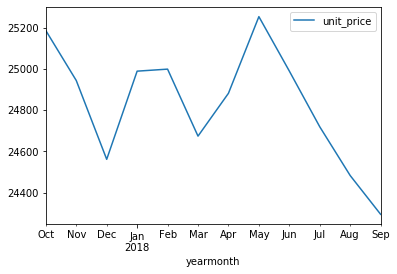

In [51]:
import matplotlib as plt

monthly_price.plot()

Let's try and experiment with one more parameter from the **Parameters** list:

- **kind** : _str_
    - 'box': boxplot
    
Create a boxplot in the following cell:

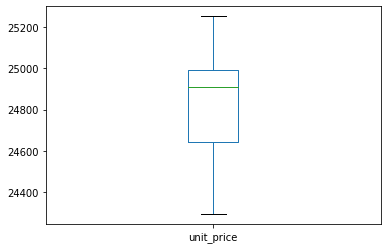

In [52]:
monthly_price.plot(kind = 'box')

Since this course is only an **introductory course** for the next machine learning modules, we'll dive deeper about each statistical plot and how to implement them in the next module of Practical Statistics. I would also recommend the official documentation of `matplotlib` for anyone wishing to gain a deeper level of familiarity with plotting using `pandas`'s implementation of `matplotlib`.